In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.utils as utils

In [3]:
import glob

data_files = glob.glob('data/pieman_data/*.nii')

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(data_files[0:1], num_factors=10)

In [6]:
prior_sample, _ = htfa.sample(posterior_predictive=False)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            prior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

prior_sample

03/25/2018 23:42:10 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.34329980e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 10]), 'voxel_noise': Normal([torch.FloatTensor of size 1]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x10]), 'Weights0': Normal([torch.FloatTensor of size 300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 10]), 'Y0': Normal([torch.FloatTensor of size 300x94537

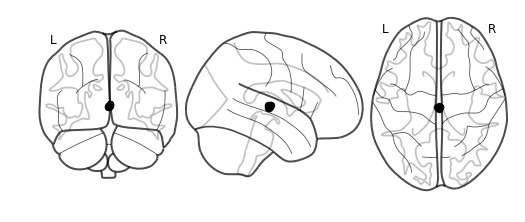

In [7]:
htfa.plot_factor_centers(trace=prior_sample)

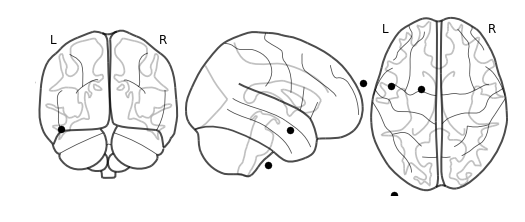

In [8]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=prior_sample)

In [9]:
del prior_sample

In [10]:
variational_sample, _ = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Prior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            variational_sample['Y%d' % s].value.data.cpu().numpy() -
            htfa.voxel_activations[s].numpy()
        )
    )

variational_sample

03/25/2018 23:42:13 Prior Reconstruction Error (Frobenius Norm) for subject 0: 5.34322119e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x1]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x1x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x1x10]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Y0': Normal([torch.F

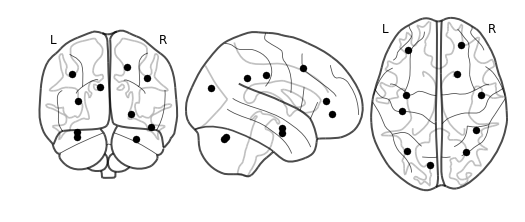

In [11]:
htfa.plot_factor_centers(trace=variational_sample)

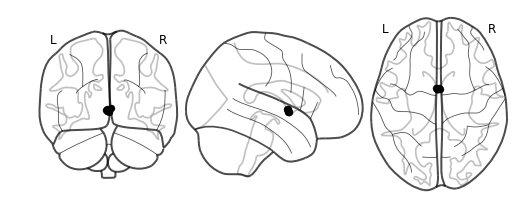

In [12]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=variational_sample)

In [13]:
del variational_sample

In [14]:
losses = htfa.train(num_steps=200, learning_rate=1e-1, log_level=logging.INFO, num_particles=4,
                    use_cuda=True)

03/25/2018 23:42:16 [Epoch 1] (2380ms) Posterior free-energy 1.41262938e+09
03/25/2018 23:42:19 [Epoch 2] (2248ms) Posterior free-energy 1.37608128e+09
03/25/2018 23:42:21 [Epoch 3] (2190ms) Posterior free-energy 1.37480090e+09
03/25/2018 23:42:23 [Epoch 4] (2276ms) Posterior free-energy 1.37599450e+09
03/25/2018 23:42:25 [Epoch 5] (2340ms) Posterior free-energy 1.38271808e+09
03/25/2018 23:42:28 [Epoch 6] (2475ms) Posterior free-energy 1.37458381e+09
03/25/2018 23:42:31 [Epoch 7] (2771ms) Posterior free-energy 1.37445312e+09
03/25/2018 23:42:33 [Epoch 8] (2339ms) Posterior free-energy 1.37446822e+09
03/25/2018 23:42:35 [Epoch 9] (2366ms) Posterior free-energy 1.37597990e+09
03/25/2018 23:42:38 [Epoch 10] (2314ms) Posterior free-energy 1.38785894e+09
03/25/2018 23:42:40 [Epoch 11] (2496ms) Posterior free-energy 1.37560870e+09
03/25/2018 23:42:43 [Epoch 12] (2404ms) Posterior free-energy 1.37601933e+09
03/25/2018 23:42:45 [Epoch 13] (2462ms) Posterior free-energy 1.37609050e+09
03/25/20

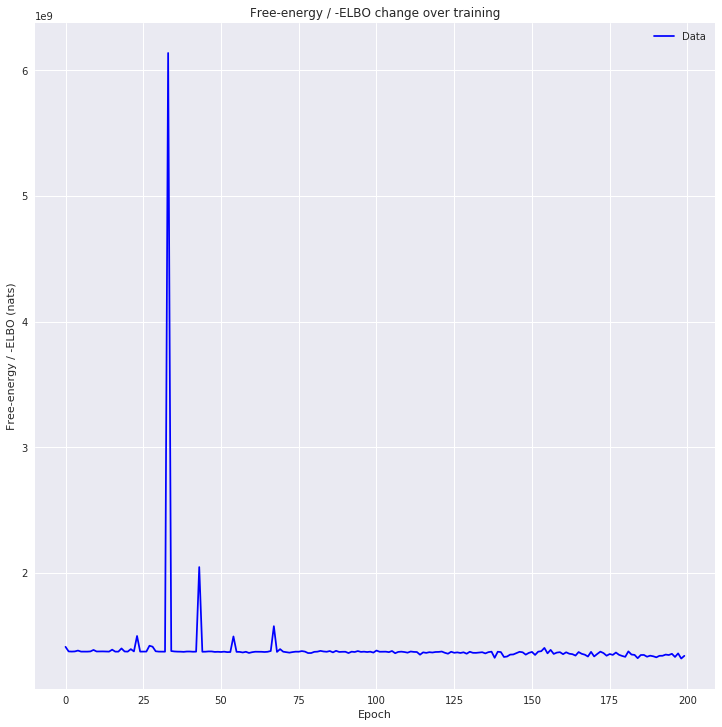

In [15]:
utils.plot_losses(losses)

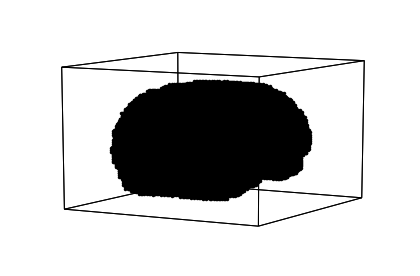

In [16]:
htfa.plot_voxels()

In [17]:
posterior_sample, q = htfa.sample(posterior_predictive=True)

for s in range(htfa.num_subjects):
    logging.info('Posterior Reconstruction Error (Frobenius Norm) for subject %d: %.8e', s,
        np.linalg.norm(
            posterior_sample['Y%d' % s].value.data.cpu().numpy() - htfa.voxel_activations[s].numpy()
        )
    )

posterior_sample

03/25/2018 23:51:09 Posterior Reconstruction Error (Frobenius Norm) for subject 0: 5.17454541e+03


Trace{'template_factor_centers__mu': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_centers__sigma': Normal([torch.FloatTensor of size 1x10x3]), 'template_factor_log_widths__mu': Normal([torch.FloatTensor of size 1x10]), 'template_factor_log_widths__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__mu__sigma': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__mu': Normal([torch.FloatTensor of size 1x10]), 'template_weights__sigma__sigma': Normal([torch.FloatTensor of size 1x10]), 'voxel_noise': Normal([torch.FloatTensor of size 1x1]), 'subject_weights_mu': Normal([torch.FloatTensor of size 1x1x10]), 'subject_weights_sigma': Normal([torch.FloatTensor of size 1x1x10]), 'Weights0': Normal([torch.FloatTensor of size 1x300x10]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x10x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x10]), 'Y0': Normal([torch.F

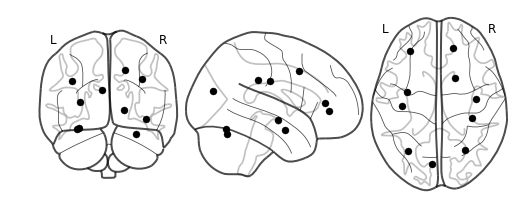

In [18]:
htfa.plot_factor_centers(trace=posterior_sample)

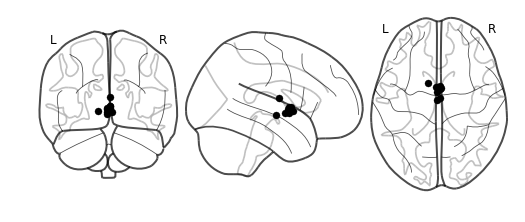

In [19]:
for s in range(htfa.num_subjects):
    htfa.plot_factor_centers(subject=s, trace=posterior_sample)